<a href="https://colab.research.google.com/github/vishant750/hotelbookinganalysis/blob/main/EDA_Hotel_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Hotel Booking Analysis**

##Project Type - EDA

##Contribution - Individual

##Individual Name - Vishant Kumar

# **Problem Statement**

## Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
## This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
## Explore and analyze the data to discover important factors that govern the bookings.

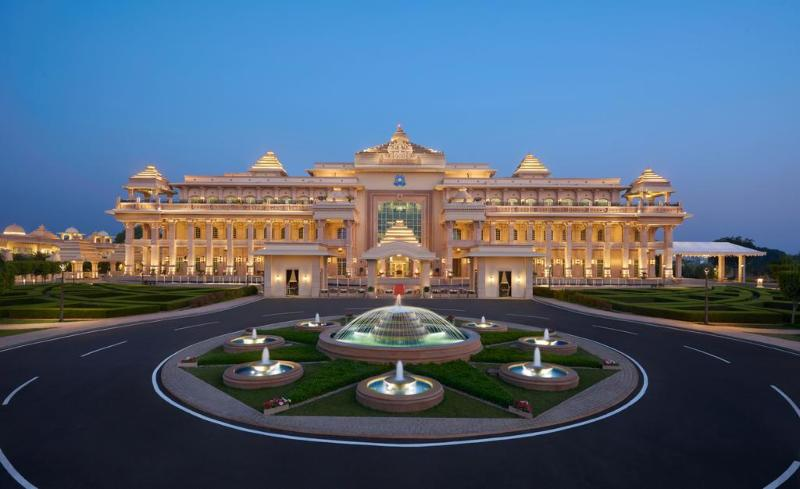

# **1.Know your Data**

### Import Libraries

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Dataset Loading

In [2]:
# Mounting the google drive for accessing google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading the datafile
hotel_data=pd.read_csv('/content/drive/MyDrive/Hotel Bookings (1).csv')

### Dataset First View

In [4]:
#Checking the data
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
#Checking the first 5 rows
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
#Checking the last 5 rows
hotel_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### Dataset Rows & Columns

In [7]:
#Shape of the dataset i.e, the number of rows and columns in the data.
hotel_data.shape 
# 119390 rows and 32 columns

(119390, 32)

In [8]:
#columns in the data
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Dataset Information

In [9]:
#overview of the data
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
# Creating the copy of the data as to keep the original data safe
hotel_df=hotel_data.copy()

In [11]:
#Renaming adr to average daily rate for convince
hotel_df.rename(columns={'adr':'average_daily_rate'},inplace =True)

In [12]:
#Getting the statistical data for all the columns
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Null values and Duplicate values

In [13]:
hotel_df.isnull().sum().sort_values(ascending=False)[:6]
#We can see that

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
dtype: int64

### We can see that there are 4 columns with null values(company,agent,country and children).We will be replacing those

In [14]:
hotel_df['children'].fillna(hotel_df['children'].mean(),inplace=True)#Replacing the null values with the mean
hotel_df['agent'].fillna(0,inplace=True)#Replacing the null values with the 0
hotel_df['country'].fillna('others',inplace=True)#Replacing the null values with others
hotel_df['company'].fillna(0,inplace=True)#Replacing the null values with 0

### Along with replacing the null values we will be also be replacing the duplicate rows

In [15]:
hotel_df[hotel_df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,0.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,0.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,0.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,0.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,0.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [16]:
hotel_df.drop_duplicates(inplace=True)

###We don't have any null and duplicate values

In [17]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [18]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138638,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455870,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Removing Outliers and Adding a few columns

In [19]:
hotel_df['total_members'] = hotel_df.children + hotel_df.babies + hotel_df.adults           
hotel_df['full_stay'] = hotel_df.stays_in_weekend_nights + hotel_df.stays_in_week_nights

Text(0, 0.5, 'average_daily_rate')

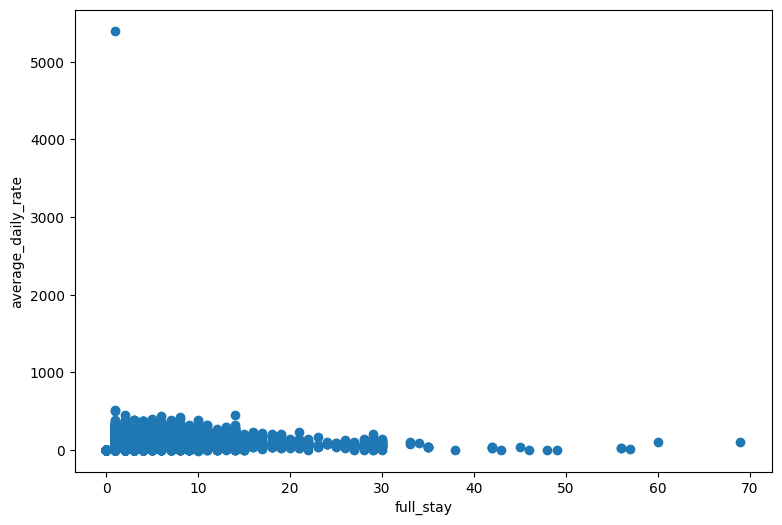

In [20]:
#Checking for outliers in Average_daily_rate
plt.figure(figsize=(9,6))
plt.scatter(hotel_df['full_stay'],hotel_df['average_daily_rate'])
plt.xlabel('full_stay')
plt.ylabel('average_daily_rate')

### Removing outliers from average_daily_rate

In [21]:
filt=hotel_df['average_daily_rate']>5000
hotel_df.drop(hotel_df[filt].index,inplace=True)

<ipython-input-22-b913bf3981d6>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='full_stay',y='average_daily_rate',data=hotel_df,palette='Spectral')


<Axes: xlabel='full_stay', ylabel='average_daily_rate'>

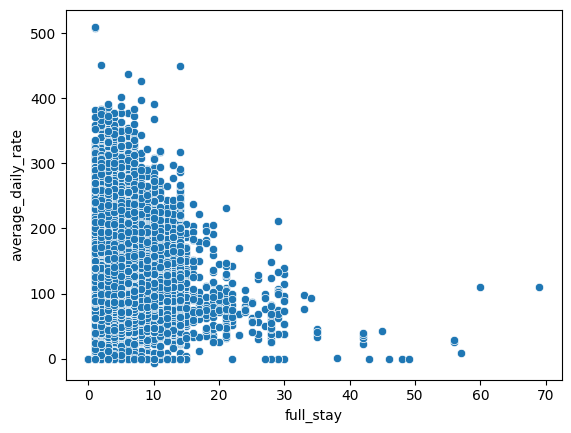

In [22]:
sns.scatterplot(x='full_stay',y='average_daily_rate',data=hotel_df,palette='Spectral')

### We can see that the longer the stay the lower the average_daily_rate, hence as an incentive it might be better to give discount to people with longer stays.

<ipython-input-23-8022ee161b63>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='total_members',y='full_stay',data=hotel_df,palette='Spectral')


<Axes: xlabel='total_members', ylabel='full_stay'>

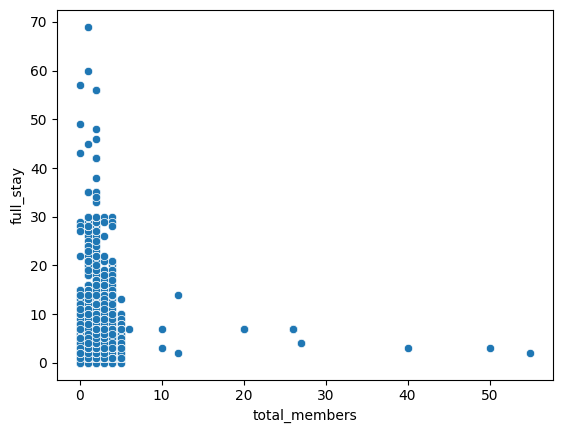

In [23]:
#We can see that more than 20 members are outliers.
sns.scatterplot(x='total_members',y='full_stay',data=hotel_df,palette='Spectral')

### Removing outliers from total_membes

In [24]:
hotel_df.drop(hotel_df[hotel_df['total_members']>20].index,inplace=True)

In [25]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87385 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87385 non-null  object 
 1   is_canceled                     87385 non-null  int64  
 2   lead_time                       87385 non-null  int64  
 3   arrival_date_year               87385 non-null  int64  
 4   arrival_date_month              87385 non-null  object 
 5   arrival_date_week_number        87385 non-null  int64  
 6   arrival_date_day_of_month       87385 non-null  int64  
 7   stays_in_weekend_nights         87385 non-null  int64  
 8   stays_in_week_nights            87385 non-null  int64  
 9   adults                          87385 non-null  int64  
 10  children                        87385 non-null  float64
 11  babies                          87385 non-null  int64  
 12  meal                           

### Lets first find the correlation between the numerical data. Also, we have added Full_stay and Total_members columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns

In [26]:
corr_df=hotel_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','average_daily_rate','required_car_parking_spaces','total_of_special_requests','full_stay','total_members']]

In [27]:
corr_df.corr()

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,full_stay,total_members
lead_time,1.000000,0.005406,-0.078937,0.077206,0.132248,0.026260,-0.086485,0.034547,0.318260,0.126272
previous_cancellations,0.005406,1.000000,0.392063,-0.010271,0.003681,-0.053098,-0.003402,0.001862,-0.021660,-0.049700
previous_bookings_not_canceled,-0.078937,0.392063,1.000000,0.005417,-0.006305,-0.090581,0.040868,0.027102,-0.064628,-0.125939
booking_changes,0.077206,-0.010271,0.005417,1.000000,0.024202,0.001446,0.048709,0.016090,0.082026,-0.007448
days_in_waiting_list,0.132248,0.003681,-0.006305,0.024202,1.000000,-0.034841,-0.016070,-0.049555,-0.010411,-0.027592
average_daily_rate,0.026260,-0.053098,-0.090581,0.001446,-0.034841,1.000000,0.041660,0.146592,0.058529,0.466036
required_car_parking_spaces,-0.086485,-0.003402,0.040868,0.048709,-0.016070,0.041660,1.000000,0.048425,-0.048938,0.036470
total_of_special_requests,0.034547,0.001862,0.027102,0.016090,-0.049555,0.146592,0.048425,1.000000,0.040250,0.146817
full_stay,0.318260,-0.021660,-0.064628,0.082026,-0.010411,0.058529,-0.048938,0.040250,1.000000,0.113702
total_members,0.126272,-0.049700,-0.125939,-0.007448,-0.027592,0.466036,0.036470,0.146817,0.113702,1.000000


Text(0.5, 1.0, 'Correlation Plot')

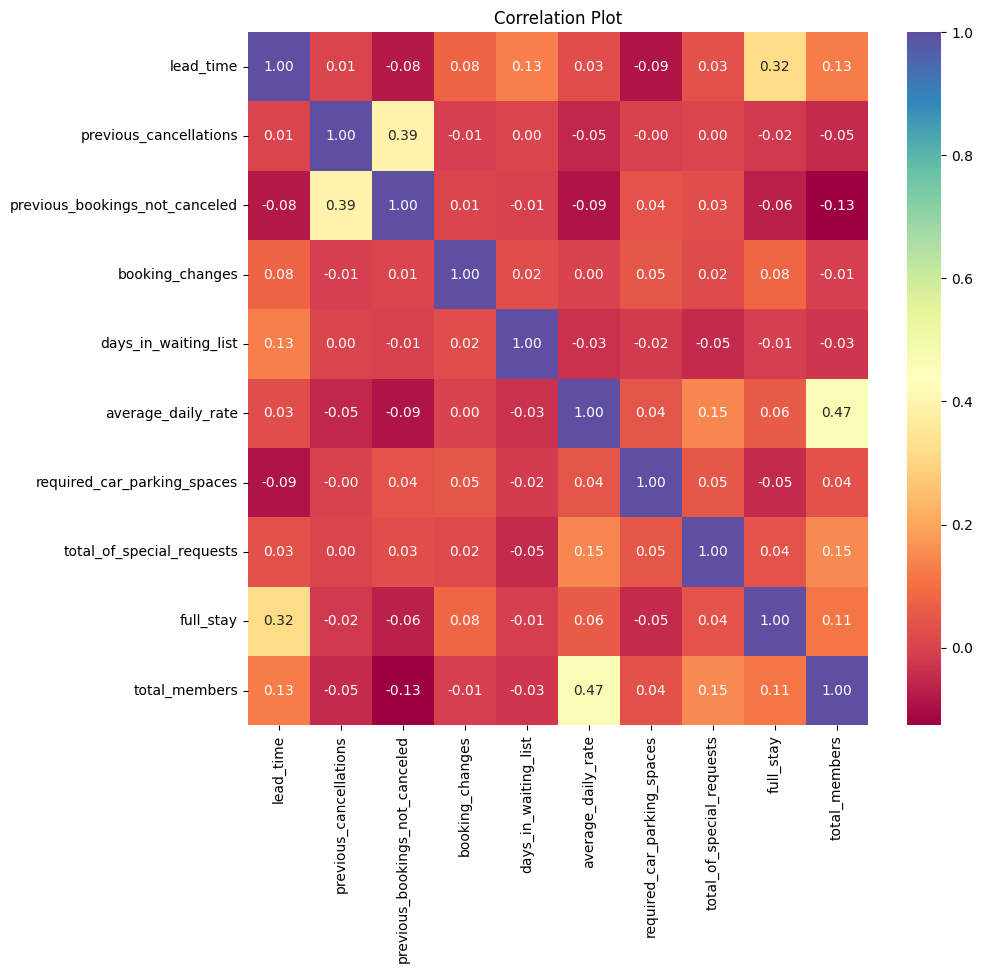

In [28]:
plt.figure(figsize=(10,9))
sns.heatmap(corr_df.corr(),annot=True,cmap="Spectral",fmt='0.2f')
plt.title('Correlation Plot')


### 1) We can see that there is correlation between total_members and average_daily_rate which means higher the number of people higher the revenue and hence the average_daily_rate.
### 2) We can see that there is correlation between full_stay and lead_time, which means people who are planning to stay in hotels for a longer time actually like to make the hotel booking beforehand.

#**2.Data Visulalization, Stroytelling and Experimenting with the Charts**

## There are two type of hotels in the data 'City' and 'Resort'

Text(0.5, 1.0, 'Required car parking space')

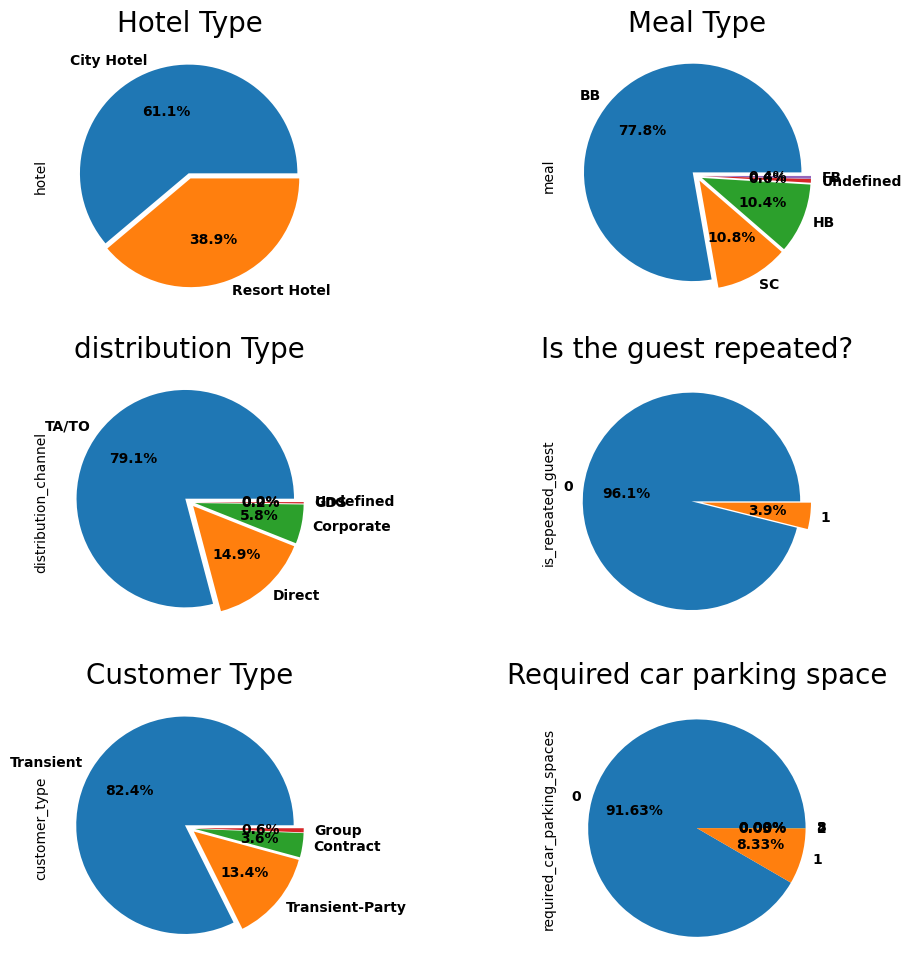

In [29]:
plt.subplot(3,2,1)
hotel_type=hotel_df['hotel'].value_counts()
hotel_type.plot.pie(autopct='%2.1f%%',explode=[0.025]*2,figsize =(12,12),textprops={'weight': 'bold'})
plt.title('Hotel Type',size=20)
#---------------------------------------------------------------------------------------------------#
plt.subplot(3,2,2)
meal_type=hotel_df['meal'].value_counts()
meal_type.plot.pie(autopct='%2.1f%%',textprops={'weight': 'bold'},explode=[0.05]*5)
plt.title('Meal Type',size=20)
#---------------------------------------------------------------------------------------------------#
plt.subplot(3,2,3)
distribution_type=hotel_df['distribution_channel'].value_counts()
distribution_type.plot.pie(autopct='%2.1f%%',textprops={'weight': 'bold'},explode=[0.05]*5)
plt.title('distribution Type',size=20)
#---------------------------------------------------------------------------------------------------#
plt.subplot(3,2,4)
repeated=hotel_df['is_repeated_guest'].value_counts()
repeated.plot.pie(autopct='%2.1f%%',textprops={'weight': 'bold'},explode=[0.05]*2)
plt.title('Is the guest repeated?',size=20)
#---------------------------------------------------------------------------------------------------#
plt.subplot(3,2,5)
customer_type=hotel_df['customer_type'].value_counts()
customer_type.plot.pie(autopct='%2.1f%%',textprops={'weight': 'bold'},explode=[0.05]*4)
plt.title('Customer Type',size=20)
#---------------------------------------------------------------------------------------------------#
plt.subplot(3,2,6)
customer_type=hotel_df['required_car_parking_spaces'].value_counts()
customer_type.plot.pie(autopct='%2.2f%%',textprops={'weight': 'bold'})
plt.title('Required car parking space',size=20)

### 1. We can see that 61.1% of guests prefer the City Hotel and 38.9% guests prefer the Resort.
### 2. We can see that most of the guests (77.8%) prefer breakfast in bed as meal type.
### 3. We can see that most of the guests used TA/TO (79.1%) for booking the hotel.
### 4. We can see that only 3.95% of the guests are repeat customers.
### 5. We can see that most of the customers (82.4%) are transient type customers.
## 6. We can see that only 8.33% of the customers require car parking.

## **Hotel wise booking data on date, month and year.**

In [30]:
#Making two seperate datasets for Resort and city hotel for analysis
resort=hotel_df[hotel_df['hotel']=='Resort Hotel']
city=hotel_df[hotel_df['hotel']=='City Hotel']

Text(0.5, 1.0, 'Booking by year')

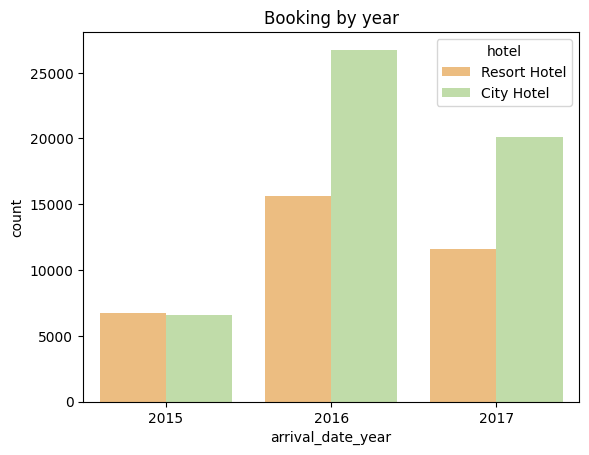

In [31]:
sns.countplot(x='arrival_date_year',data=hotel_df,hue='hotel',palette='Spectral')
plt.title('Booking by year')

##We can see that most of the guests arrived in 2016 and least number of guests arrived in 2015 for both resort and city hotels.

In [32]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type',
       'average_daily_rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'total_members', 'full_stay'],
      dtype='object')

Text(0.5, 1.0, 'Booking by the day of the month')

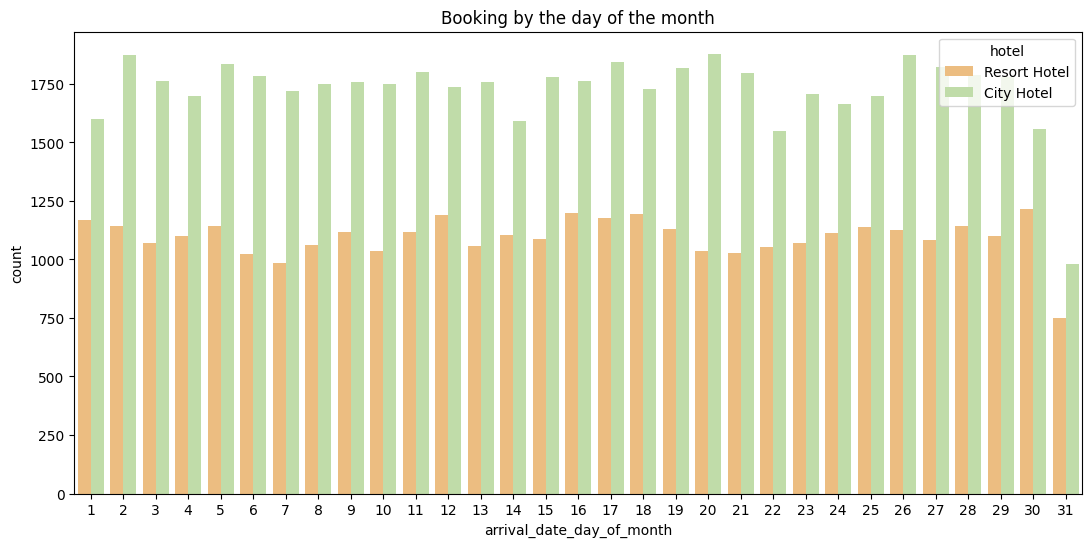

In [33]:
plt.figure(figsize=(13,6))
sns.countplot(x='arrival_date_day_of_month',data=hotel_df,hue='hotel',palette='Spectral')
plt.title('Booking by the day of the month')

## We can see that no of guests decreases by the end of the month


In [34]:
#Creating temprory dataframes(city_df and resort_df) for data visualization.
#Both the datasets have [sort by] column mapped sorting dictionary to sort according to the arrival_date_month.
city_df=pd.DataFrame(city['arrival_date_month'].value_counts().sort_index())
city_df.reset_index(inplace=True)
city_df.columns=['month','guests in the hotel']
sorting_dictionary={'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
city_df['sort by']=city_df['month'].map(sorting_dictionary)

resort_df=pd.DataFrame(resort['arrival_date_month'].value_counts().sort_index())
resort_df.reset_index(inplace=True)
resort_df.columns=['month','guests in the hotel']
resort_df['sort by']=resort_df['month'].map(sorting_dictionary)

<ipython-input-50-3ca5303ace8b>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='month',y='guests in the hotel',data=city_df.sort_values('sort by'),sort=False,label='city hotel',palette='Spectral')
<ipython-input-50-3ca5303ace8b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='month',y='guests in the hotel',data=resort_df.sort_values('sort by'),sort=False,label='resort',palette='Spectral')


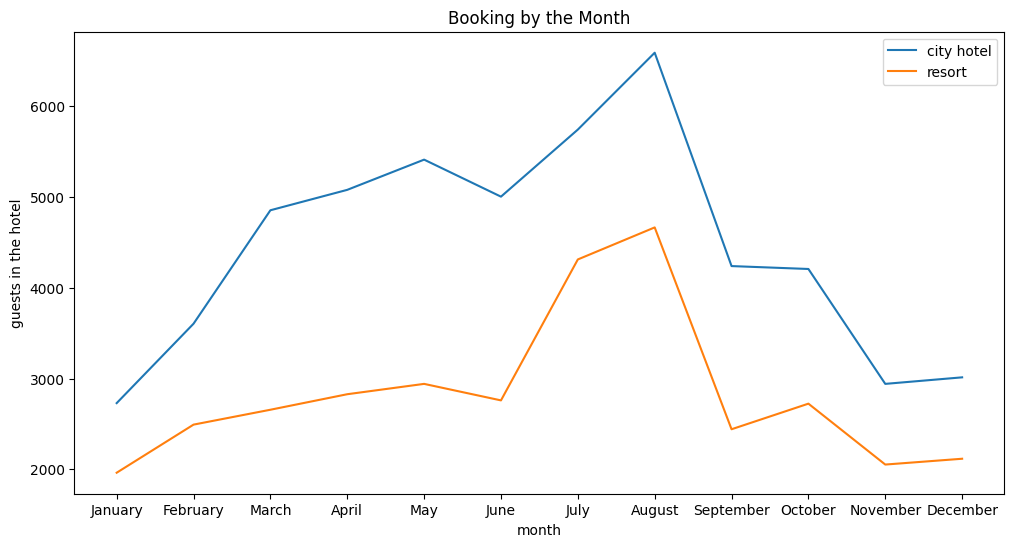

In [50]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month',y='guests in the hotel',data=city_df.sort_values('sort by'),sort=False,label='city hotel',palette='Spectral')
sns.lineplot(x='month',y='guests in the hotel',data=resort_df.sort_values('sort by'),sort=False,label='resort',palette='Spectral')
plt.legend()
plt.title('Booking by the Month')
plt.show()

## We can see that May,June,July and August are the busiest of months for both resorts and city hotels.

## **From which country are the guests coming ?**

Text(0.5, 1.0, 'Booking by the Country')

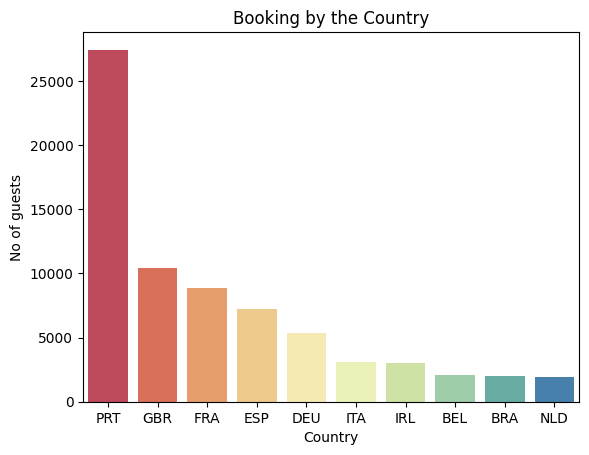

In [36]:
sns.barplot(y=hotel_df['country'].value_counts().head(10),x=hotel_df['country'].value_counts().head(10).index,palette='Spectral')
plt.ylabel('No of guests')
plt.xlabel('Country')
plt.title('Booking by the Country')

## We can see that most of the guests are coming from Portugal followed by UK and France.Hence, hotel facilities should be more focused on Europe clients.

Text(0.5, 1.0, 'Booking by the total members')

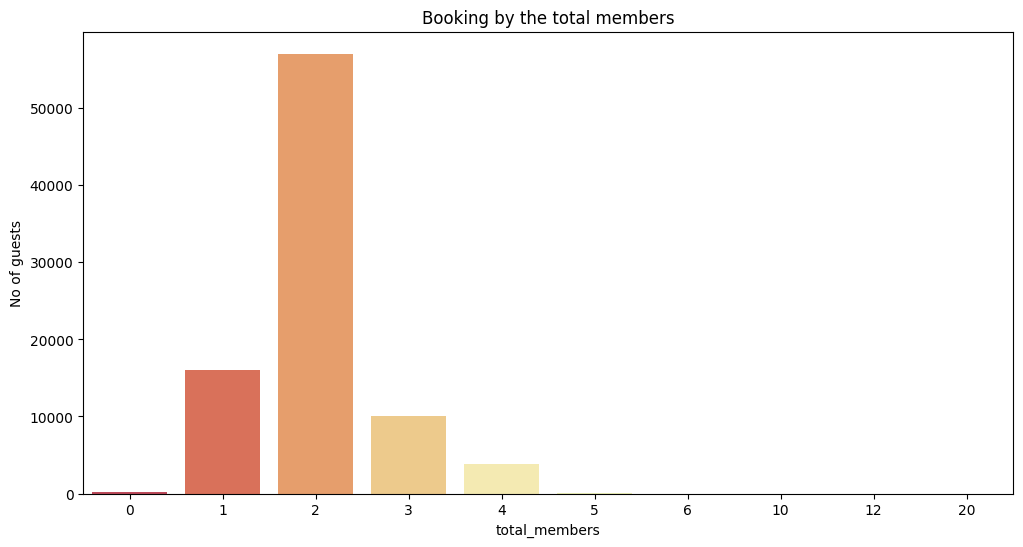

In [37]:
#Converting float values to int
hotel_df['total_members']=hotel_df['total_members'].astype(int)
plt.figure(figsize=(12,6))
sns.countplot(x=hotel_df['total_members'],palette='Spectral')
plt.ylabel('No of guests')
plt.title('Booking by the total members')

## We can see most of the guest like to come as a pair of 2.

## **Which agent has done the maximum booking?**

Text(0.5, 1.0, 'No of bookings done by the agent')

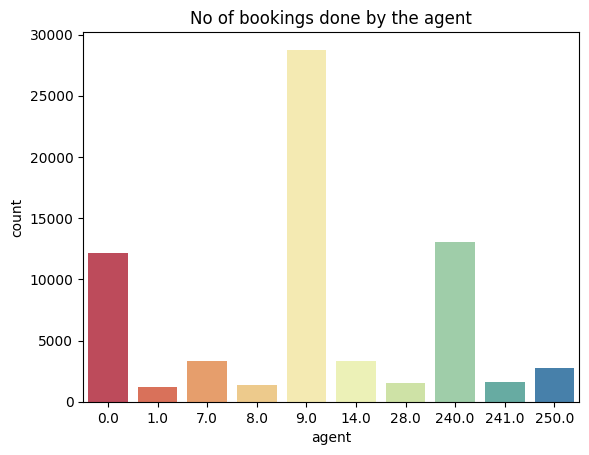

In [38]:
agent_df=hotel_df['agent'].value_counts().sort_values(ascending=False).reset_index().head(10)
agent_df.columns=['agent','count']
sns.barplot(x='agent',y='count',data=agent_df,palette='Spectral')
plt.title('No of bookings done by the agent')

## We can see that agent 9.0 has done most of the bookings.

## **Most preferred room type**

In [39]:
preferred_room_type=hotel_df['assigned_room_type'].value_counts().reset_index()
preferred_room_type.columns=['room type','count']
preferred_room_type

,room type,count
0,A,46302
1,D,22432
2,E,7195
3,F,3627
4,G,2498
5,C,2165
6,B,1820
7,H,706
8,I,357
9,K,276


Text(0.5, 1.0, 'Preferred room')

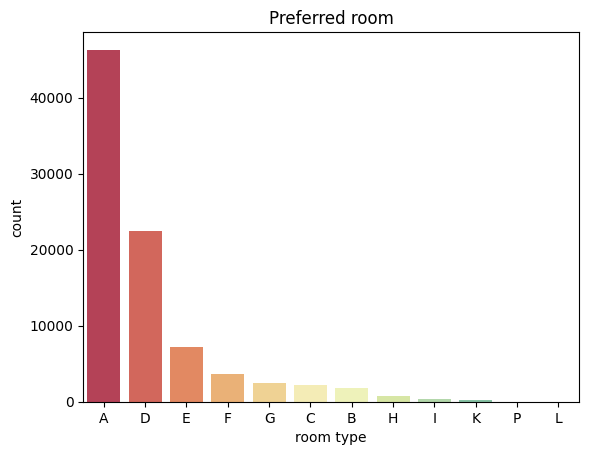

In [40]:
sns.barplot(data=preferred_room_type,x='room type',y='count',palette='Spectral')
plt.title('Preferred room')

## We can see that most preferred room in type A

## **Stay length in hotels**

In [41]:
stay_length_df=hotel_df['full_stay'].value_counts().head()
stay_length_df.columns=['count']
stay_length_df

3    17837
1    17183
2    15744
4    13573
7     7522
Name: full_stay, dtype: int64

Text(0.5, 1.0, 'Stay length in hotels')

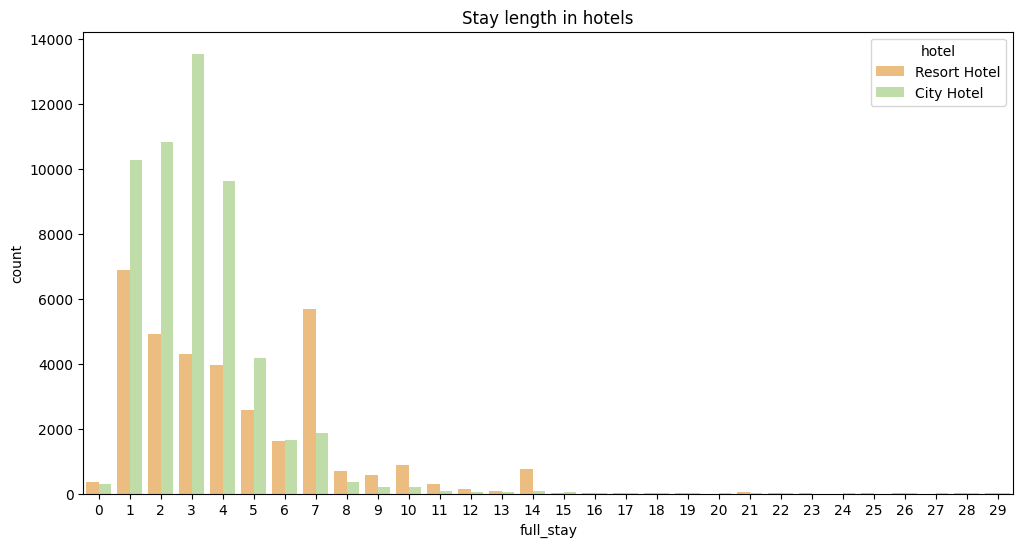

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x=hotel_df[hotel_df['full_stay']<30]['full_stay'],hue=hotel_df['hotel'],palette='Spectral')
#Removing outliers with count greater than 30
plt.title('Stay length in hotels')

## Most common stays are 4 days and people prefer resort over city hotel for longer stay.

<Axes: title={'center': 'Number of stays in weekends night'}, xlabel='stays_in_weekend_nights', ylabel='count'>

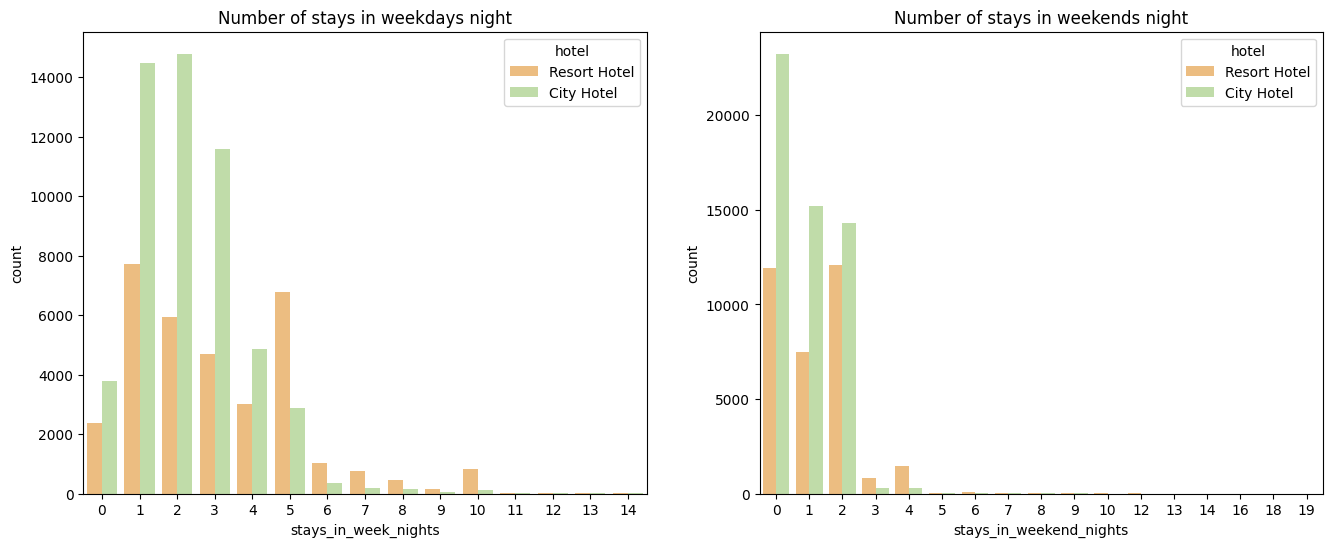

In [43]:
#
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Number of stays in weekdays night')
sns.countplot(x=hotel_df[hotel_df['stays_in_week_nights']<15]['stays_in_week_nights'],hue=hotel_df['hotel'],palette='Spectral')
plt.subplot(1,2,2)
plt.title('Number of stays in weekends night')
sns.countplot(x=hotel_df['stays_in_weekend_nights'],hue=hotel_df['hotel'],palette='Spectral')

## We can see that most people prefer city hotels over resorts irrespective of weekend and week nights.

Text(0.5, 1.0, 'Average daily rate vs Full stays')

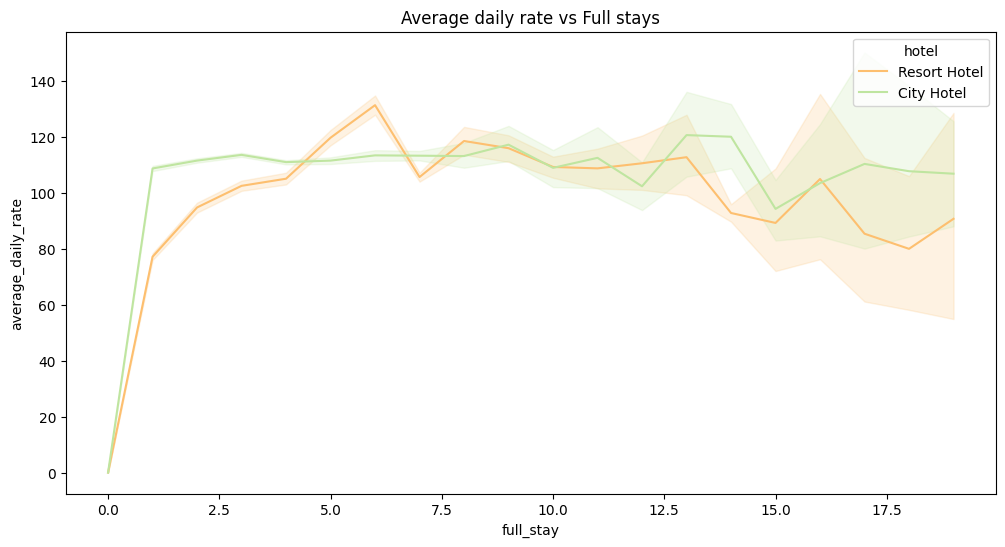

In [44]:
plt.figure(figsize=(12,6))
sns.lineplot(data=hotel_df,x=hotel_df[hotel_df['full_stay']<20]['full_stay'].astype(int),y=hotel_df['average_daily_rate'],palette='Spectral',hue=hotel_df['hotel'])
plt.title('Average daily rate vs Full stays')


## We can see that after 2 days average_daily_rate for both city hotel and resort is in the range of 100 to 130. To get minimum average_daily_rate for in both city and resort hotels we should plan our stay for atleast 6-7 days,also average_daily_rate decreases after 14 days.

## **Cancellation Rate**

Text(0.5, 1.0, 'is_canceled vs deposit_type')

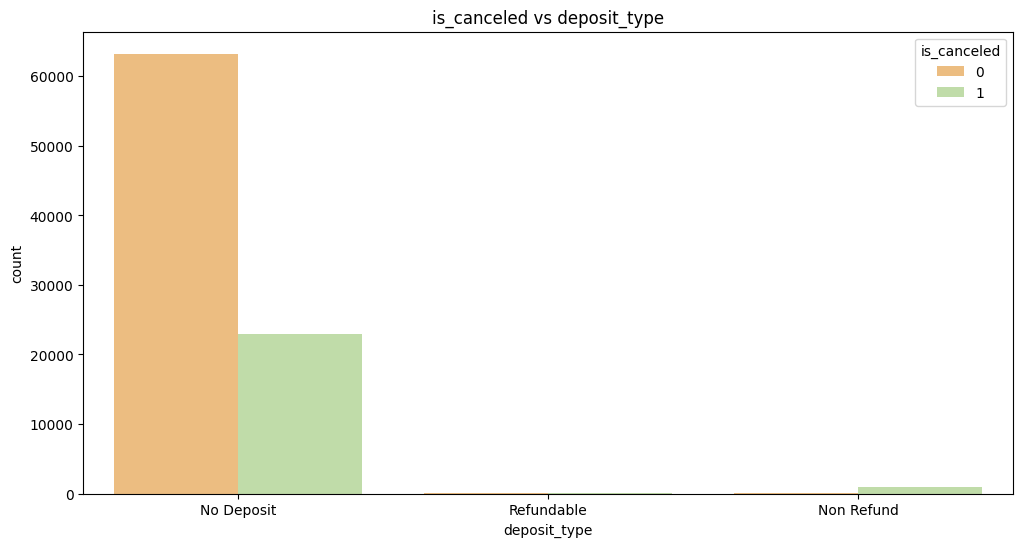

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(data=hotel_df,x='deposit_type',hue='is_canceled',palette='Spectral')
plt.title('is_canceled vs deposit_type')

## We can see that most bookings are 'No deposit' and most cancellation are 'No deposit' as well.

<Axes: xlabel='arrival_date_year', ylabel='lead_time'>

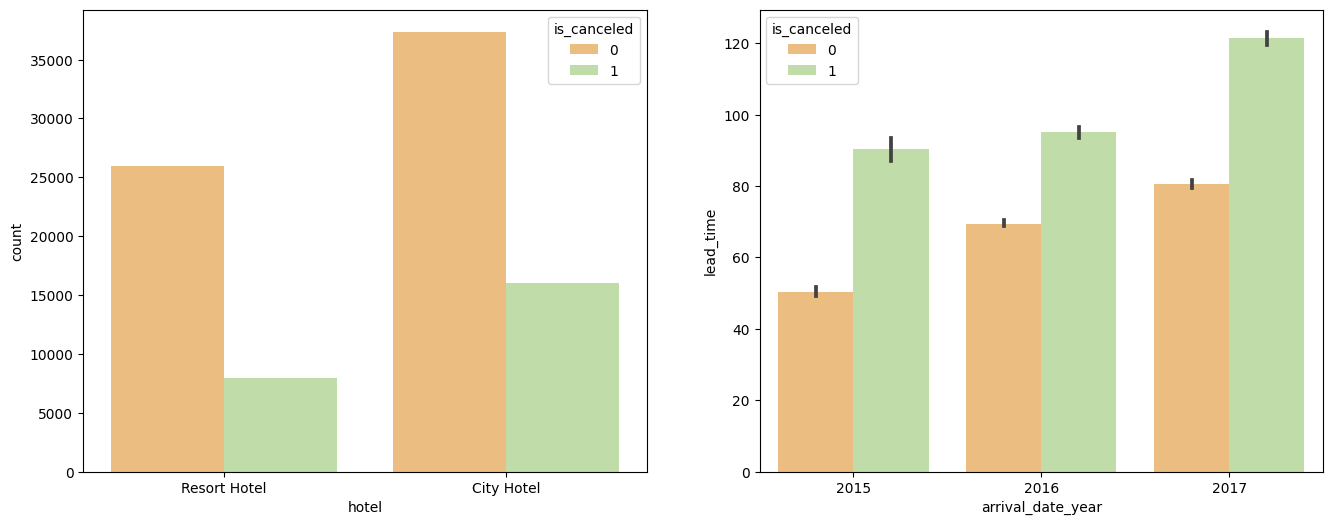

In [46]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(data=hotel_df,x='hotel',hue='is_canceled',palette='Spectral')
plt.subplot(1,2,2)
sns.barplot(data=hotel_df,x='arrival_date_year',y='lead_time',hue='is_canceled',palette='Spectral')


## We can see that cancellation is higher in the city hotels than in the resorts.
## Also with more leadtime there is higher possibility of cancellation.

## **Waiting time**

<Axes: xlabel='hotel', ylabel='days_in_waiting_list'>

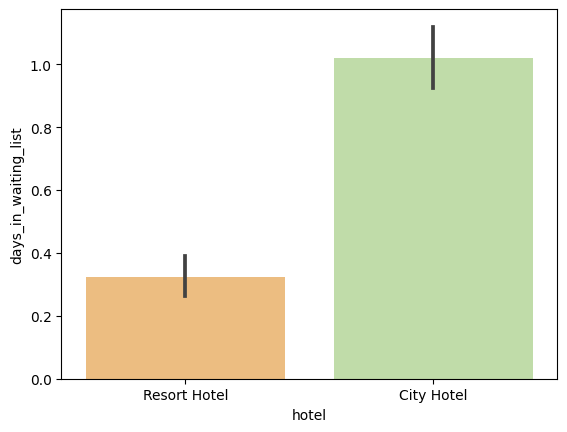

In [47]:
sns.barplot(data=hotel_df,x='hotel',y='days_in_waiting_list',palette='Spectral')

## We can see that Resorts have significantly less waiting time than city hotels.

## **Average daily rate and price**

Text(0.5, 1.0, 'Average daily rate month wise')

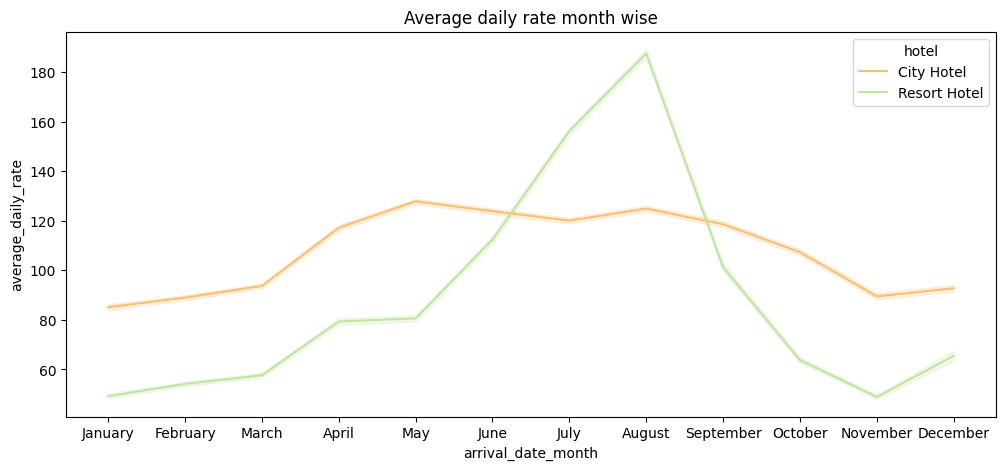

In [48]:
hotel_df['sort by']=hotel_df['arrival_date_month'].map(sorting_dictionary)
hotel_df.sort_values('sort by',inplace=True)
plt.figure(figsize=(12,5))
sns.lineplot(data = hotel_df, x = 'arrival_date_month', y = 'average_daily_rate',sort=True, hue = 'hotel',palette='Spectral')
plt.title('Average daily rate month wise')

## We can see that for resorts the average rate is more expensive during august,july and september,while for city hotels average rate is more expensive during august, july, june and may.

## **Special Requests**

<Axes: xlabel='total_of_special_requests', ylabel='count'>

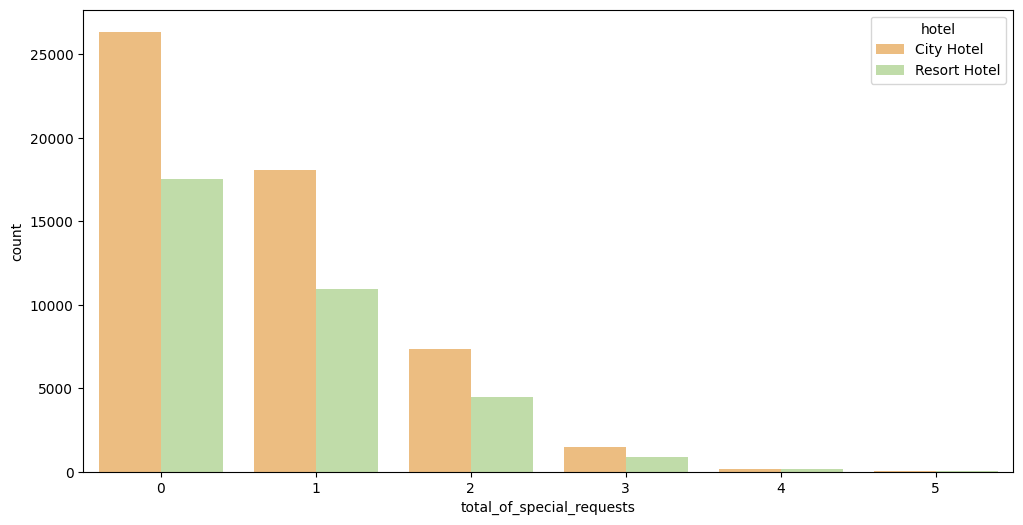

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(data=hotel_df,x='total_of_special_requests',hue='hotel',palette='Spectral')

## We can see that city hotels have a lot more special requests than resorts, most of the guests don't have any special requests, and the guests who do have only 1 special request.

# **3.Conclusion**


## 1. Around 60% bookings are for City hotel and 40% bookings are for Resort hotel, therefore city Hotel is busier than Resorts.
## 2. Majority of the hotels booked are city hotel,hotels need to spend the majority of fund on those hotel.
## 3. Most of the bookings are from May to Aug, incentives for attracting guests in this period can gain significant profits.
## 4. There are very less repeat customers therefore hotels should focus more on providing better service or incentives so that this number can be improved.
## 5. Most bookings are done by TA/TO.
## 6. Most common stay length is less than 4 days and generally people prefer city hotel for short stay, but for long stays, Resorts are preferred.
## 7. Least bookings are done in november,december,january and february therefore it is beneficial for the guests to book the hotel in these months for easy bookings and lower prices.